<h3>Quandl</h3>

Your auth token can be found by going into your Quandl account. You can pull something like 50 free pulls per IP address, but, if you make a free account, you can pull some massive amount of requests, so I suggest you just make an account with Quandl.
<hr>
The token is read by running (security reason a separate Python program) "<b>read_token</b>" and store the content into a separate variable <b>auth_tok</b>

In [1]:
%run read_token.ipynb

In [10]:
import seaborn as sns
sns.set()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import pandas as pd
import numpy as np
import os
import quandl
import time

In [3]:
data = quandl.get("EURONEXT/KBC", 
                  trim_start = "2018-01-01", 
                  trim_end = "2019-01-25", 
                  authtoken=auth_tok)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [14]:
data['range'] = data['High']-data['Low']
data.head()
data.sort_values(by='range',ascending=False).head(5)

,Open,High,Low,Last,Volume,Turnover,range
Date,,,,,,,
2018-05-29,68.00,68.62,65.38,65.72,1950851.0,1.292936e+08,3.24
2018-02-08,76.94,77.48,74.34,74.70,939361.0,7.096546e+07,3.14
2018-02-07,74.74,76.92,73.84,76.66,1072115.0,8.127877e+07,3.08
2018-02-09,74.28,74.36,71.38,72.88,1462901.0,1.063408e+08,2.98
2018-03-22,71.84,72.54,69.58,69.98,1202004.0,8.478227e+07,2.96


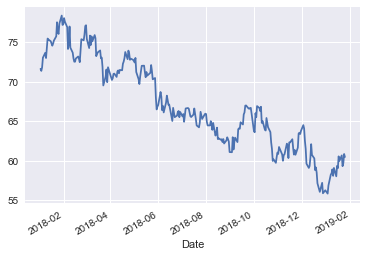

In [11]:
data['Open'].plot()

In [23]:
data['ret'] = data['Last'].pct_change(periods=1)
data['logret'] = data['ret'].apply(lambda x: np.log(1+x))
data['drawdown'] = data['Last'].rolling(window=30).apply(lambda x : -np.max(x)+x[0])

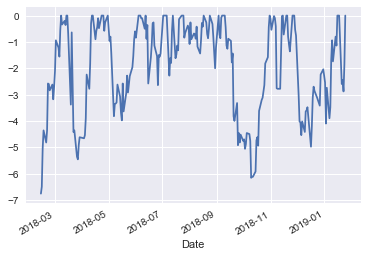

In [24]:
data['drawdown'].plot()